In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


#assignment: infere corrlation

In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df[['age','physical_score']].describe()

,age,physical_score
count,5000.000000,5000.000000
mean,51.609000,32.760260
std,11.287001,8.169802
min,18.000000,-0.000000
25%,43.000000,26.700000
50%,51.000000,35.300000
75%,60.000000,38.900000
max,90.000000,50.000000


In [7]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

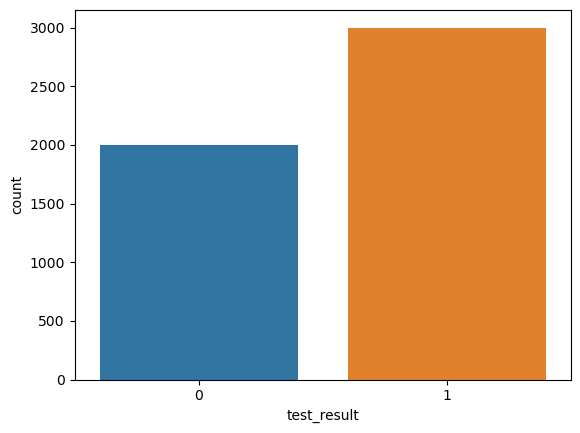

In [8]:
sns.countplot(data=df,x='test_result')

<AxesSubplot:xlabel='test_result', ylabel='age'>

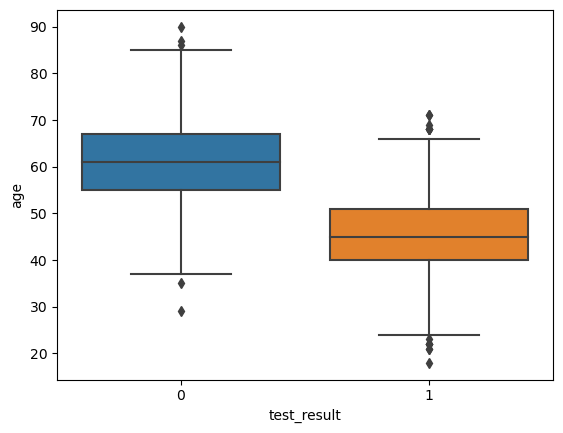

In [9]:
sns.boxplot(x='test_result',y='age',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

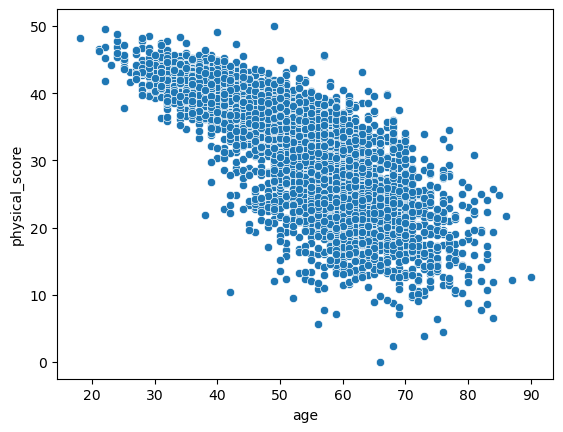

In [10]:
sns.scatterplot(x='age',y='physical_score',data=df)

<AxesSubplot:xlabel='age', ylabel='physical_score'>

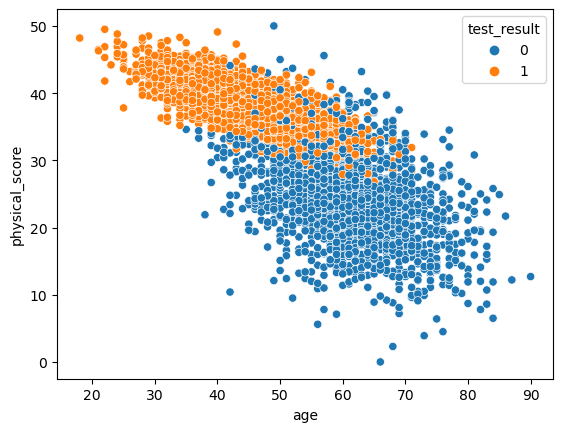

In [11]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

In [12]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


<AxesSubplot:xlabel='test_result', ylabel='physical_score'>

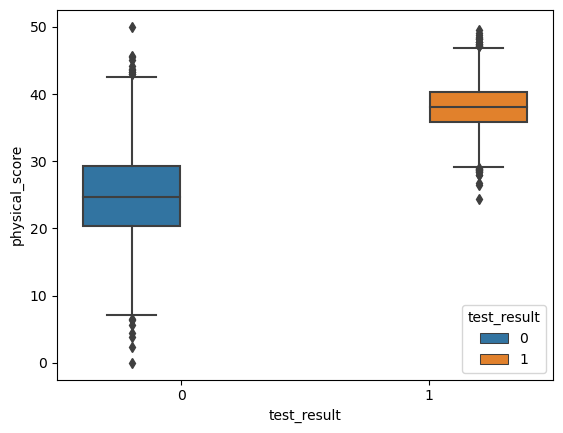

In [13]:
sns.boxplot(x='test_result',y='physical_score',data=df,hue='test_result')

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

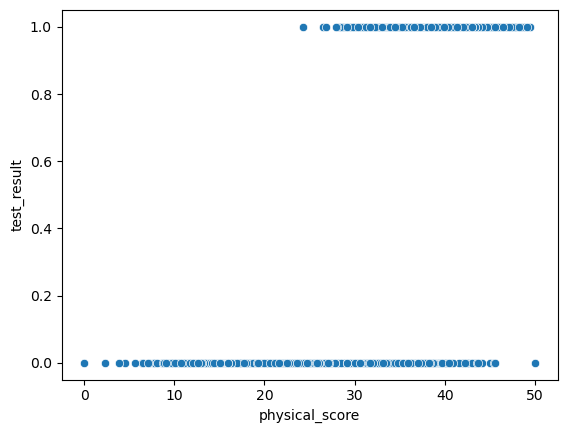

In [14]:
sns.scatterplot(y='test_result',x='physical_score',data=df)

##TRAIN TEST SPLIT

In [15]:
x = df.drop('test_result',axis=1)
y = df['test_result']

## Scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=50)

In [18]:
sc = StandardScaler()

In [19]:
sc.fit(x_train)

StandardScaler()

In [20]:
sc_x_train = sc.transform(x_train)
sc_x_train = sc.transform(x_test)


## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
##help(LogisticRegression)

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
len(log_model.predict(x_test))

1000

In [26]:
y_pred = log_model.predict(x_test)

In [27]:
y_proba = log_model.predict(x_test)

In [28]:
log_model.predict(x_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,

In [29]:
log_model.predict_proba(x_test)[1]

array([0.12736401, 0.87263599])

In [30]:
log_model.coef_

array([[-0.08022407,  0.42385174]])

* Odds of passing the (orignal coeff was negative) per uint increase in age
* Odds of passing the test increase (orignal coeff was postive) per uint increase in physical score
* Based on the ratio (3.4/0.9), the physical score is a stronger predictor than the age

Model Performance

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,RocCurveDisplay,PrecisionRecallDisplay

In [32]:
accuracy_score(y_test,y_pred)

0.925

In [33]:
confusion_matrix(y_test,y_pred)

array([[352,  37],
       [ 38, 573]], dtype=int64)

In [34]:
cm = confusion_matrix(y_test,y_pred,normalize='all')

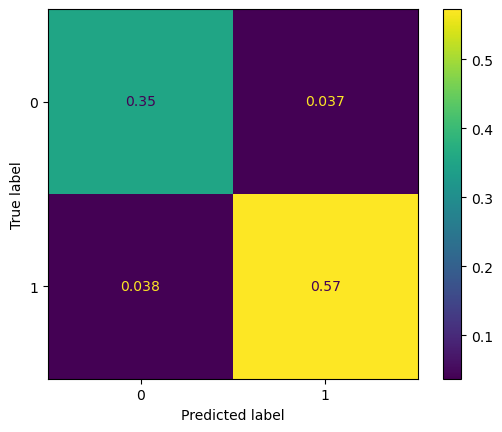

In [35]:
ConfusionMatrixDisplay(cm).plot()

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       389
           1       0.94      0.94      0.94       611

    accuracy                           0.93      1000
   macro avg       0.92      0.92      0.92      1000
weighted avg       0.93      0.93      0.93      1000



In [37]:
from sklearn import metrics

In [38]:
y_score = y_proba[:,]

In [39]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,y_score)

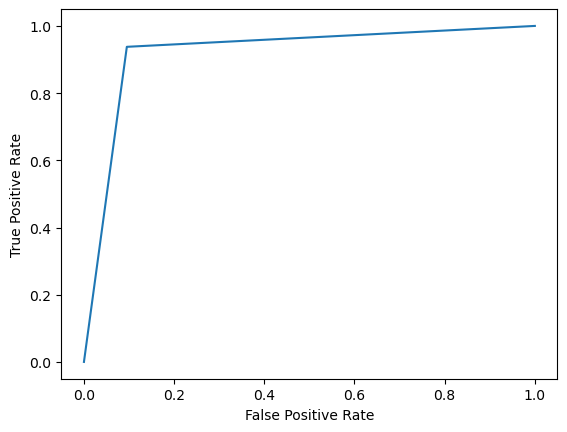

In [40]:
RocCurveDisplay(fpr = fpr,tpr=tpr).plot()

In [41]:
#help(metrics.precision_recall_curve)

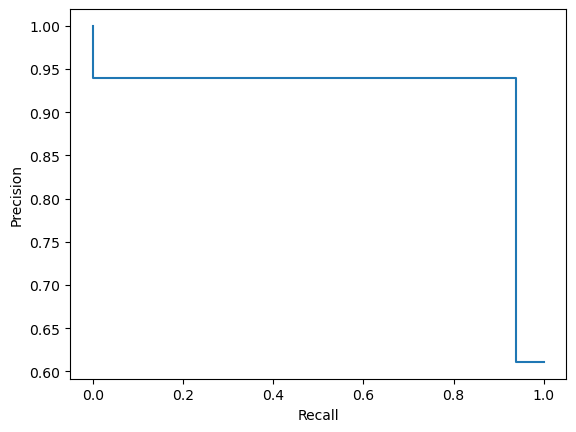

In [42]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_score)

PrecisionRecallDisplay(precision=precision,recall=recall).plot()